In [1]:
import os
import time
import numpy as np
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
import thomsonpy.data_management.formatter as fmt
import thomsonpy.data_management.fragmenter as frm
import thomsonpy.data_management.octree.octree as octr
import thomsonpy.data_management.visualizer as vis
import thomsonpy.config.paths as paths
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.constants.units as units

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
prefix = "../../"
predsci_data_filepath = prefix + paths.PREDSCI_DATA_PATH + paths.PREDSCI_FILENAME
octree_data_filepath = f"{prefix}{paths.OCTREE_DATA_PATH}{os.path.splitext(paths.PREDSCI_FILENAME)[0]}.data"
octrees_path = prefix + paths.OCTREES_PATH 

In [5]:
# DATA FRAGMENTING
print("\nStarting data formatting and fragmenting...")

ne_raw = frm.get_ne_raw(predsci_data_filepath)
data_radial = frm.get_ne_raw_coords(predsci_data_filepath, "radial")
data_theta = frm.get_ne_raw_coords(predsci_data_filepath, "theta")
data_phi = frm.get_ne_raw_coords(predsci_data_filepath, "phi")

ini_time = time.perf_counter()
octree_data = []
octree_data = frm.fragment(frm.selection, ne_raw, data_radial, data_theta, data_phi)
fin_time = time.perf_counter()

print("Data formatting and fragmentation in", fin_time - ini_time, "seconds.")

fmt.dump(octree_data_filepath, octree_data)
print(f"Stored data for octree at {paths.OCTREE_DATA_PATH}")

print("Octree will have", len(octree_data), "points")


Starting data formatting and fragmenting...

Loading datasets from ../../data/predictive_science/eclipse2021_mhd_final/corona/rho002.hdf :
 {'fakeDim0': (('fakeDim0',), (699,), 5, 0), 'fakeDim1': (('fakeDim1',), (327,), 5, 1), 'fakeDim2': (('fakeDim2',), (288,), 5, 2), 'Data-Set-2': (('fakeDim0', 'fakeDim1', 'fakeDim2'), (699, 327, 288), 5, 3)}
# POINTS =  65829024

Loading datasets from ../../data/predictive_science/eclipse2021_mhd_final/corona/rho002.hdf :
 {'fakeDim0': (('fakeDim0',), (699,), 5, 0), 'fakeDim1': (('fakeDim1',), (327,), 5, 1), 'fakeDim2': (('fakeDim2',), (288,), 5, 2), 'Data-Set-2': (('fakeDim0', 'fakeDim1', 'fakeDim2'), (699, 327, 288), 5, 3)}
RADIAL (RSOL, 1-30). # radial = 288

Loading datasets from ../../data/predictive_science/eclipse2021_mhd_final/corona/rho002.hdf :
 {'fakeDim0': (('fakeDim0',), (699,), 5, 0), 'fakeDim1': (('fakeDim1',), (327,), 5, 1), 'fakeDim2': (('fakeDim2',), (288,), 5, 2), 'Data-Set-2': (('fakeDim0', 'fakeDim1', 'fakeDim2'), (699, 327, 28

In [9]:
vis.vis_octree_data(octree_data_filepath)

In [ ]:
vis.vis_ne(octree_data_filepath)

In [4]:
import os
import time

import thomsonpy.config.octree_params as op

## OCTREE CREATION AND STORAGE
min_v = [op.MIN_1, op.MIN_2, op.MIN_3, op.MIN_4]
max_v = [op.MAX_1, op.MAX_2, op.MAX_3, op.MAX_4]

i = 0
# Loading data...
octree_data = fmt.load(octree_data_filepath)
print("Loaded octree data:", len(octree_data), "points.")
octree = 0

Loaded octree data: 10751832 points.


In [6]:
# Creating octree...
print("Creating octree with params:")
print("MAX_LEVEL =", op.MAX_LEVEL)
print("MAX_DATA =", op.MAX_DATA)
print("MIN_V =", min_v[i])
print("MAX_V =", max_v[i])
ini_time = time.perf_counter()
octree = octr.Octree(op.MAX_LEVEL, op.MAX_DATA, octree_data, min_v[i], max_v[i])
fin_time = time.perf_counter()
print("Octree " + str(i + 1) + " built in", str((fin_time - ini_time) / 60), "minutes.")
octr.Octree.save(octree, octrees_path + "octree_" + str(i + 1) + ".oct")
print("Octree " + str(i + 1) + " created at", paths.OCTREES_PATH)

Creating octree with params:
MAX_LEVEL = 6
MAX_DATA = 1000
MIN_V = [0 0 0]
MAX_V = [1.47716021e+09 1.47716021e+09 1.47716021e+09]
0.0 %
0.9300740562166522 %
1.8601481124333044 %
2.7902221686499566 %
3.7202962248666087 %
4.650370281083261 %
5.580444337299913 %
6.510518393516565 %
7.440592449733217 %
8.37066650594987 %
9.300740562166522 %
10.230814618383175 %
11.160888674599827 %
12.090962730816479 %
13.02103678703313 %
13.951110843249785 %
14.881184899466435 %
15.811258955683089 %
16.74133301189974 %
17.67140706811639 %
18.601481124333045 %
19.531555180549695 %
20.46162923676635 %
21.391703292983 %
22.321777349199653 %
23.251851405416303 %
24.181925461632957 %
25.111999517849608 %
26.04207357406626 %
26.97214763028291 %
27.90222168649957 %
28.83229574271622 %
29.76236979893287 %
30.69244385514952 %
31.622517911366177 %
32.55259196758283 %
33.48266602379948 %
34.41274008001613 %
35.34281413623278 %
36.272888192449436 %
37.20296224866609 %
38.13303630488274 %
39.06311036109939 %
39.993184

In [4]:
octree = octr.Octree.load(octrees_path + "octree_1.oct")
vis.vis_octree(octree)

In [3]:
"""
Starts execution of solar corona modeling with the Predictive Science model.
"""
print("Imaging between", sip.IMAGE_MIN * units.METERS_TO_RSOL, "RSol and" , sip.IMAGE_MAX * units.METERS_TO_RSOL, "RSol.")
print("Resolution = ", sip.IMAGE_RESOLUTION / 1000, " km (", sip.IMAGE_NUM_POINTS, "x", sip.IMAGE_NUM_POINTS, ").")
x_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS) # de - a +
#print(x_values * units.METERS_TO_RSOL)
y_values = np.linspace(sip.MIN_COORD, sip.MAX_COORD, sip.IMAGE_NUM_POINTS)[::-1] # de + a -
#print(y_values * units.METERS_TO_RSOL)
model = np.zeros((sip.IMAGE_NUM_POINTS, sip.IMAGE_NUM_POINTS))
print("# Numeric integral steps =", tsp.NUM_Z)

Imaging between [0. 0.] RSol and [2.12132034 2.12132034] RSol.
Resolution =  10000.0  km ( 148 x 148 ).
# Numeric integral steps = 8.0


In [4]:
# Quadrant 1
print("Loading octree...")
NE_MODEL = octr.Octree.load(octrees_path + "octree_1.oct")
print("Octree loaded.")

num_points = sip.IMAGE_NUM_POINTS * sip.IMAGE_NUM_POINTS
print(f"Num points = {num_points}")
count = 0
for y in range(sip.IMAGE_NUM_POINTS):
    for x in range(sip.IMAGE_NUM_POINTS):
        if (x_values[x]**2 + y_values[y]**2) > tsp.SOLAR_RADIUS**2:
            # Coordinates with the center of the Sun as Origin of the Reference System.
            target = (x_values[x], y_values[y], 0)
            #print(target * units.METERS_TO_RSOL)
            # Creates a ThomsonGeometry object to manage the ray - tracing across the Corona.
            TG = thtools.ThomsonGeometry(sip.SUN_CENTER, sip.OBSERVER, target, tsp.SOLAR_RADIUS)

            # Line of sight integration generating a value for the scattered light model.
            scattered_light = thtools.get_scattered_light(tsp.WAVELENGTH, tsp.T_SOL, tsp.X, TG.get_elongation(), tsp.INI_Z, tsp.FIN_Z, tsp.INCR_Z, TG, NE_MODEL)
            model[y][x] = scattered_light
        else:
            model[y][x] = 0

        # Progress
        count += 1
        if count % 1000 == 0:
            print("Progress", count / num_points * 100,"%")

fmt.dump(f"../../{paths.MODELS_PATH}predsci_test_30x30_8steps.np", model)


Loading octree...
Octree loaded.
Num points = 21904
Progress 4.565376186997808 %
Progress 9.130752373995616 %
Progress 13.696128560993426 %
Progress 18.261504747991232 %
Progress 22.826880934989045 %
Progress 27.39225712198685 %
Progress 31.95763330898466 %
Progress 36.523009495982464 %
Progress 41.088385682980274 %
Progress 45.65376186997809 %
Progress 50.2191380569759 %
Progress 54.7845142439737 %
Progress 59.349890430971506 %
Progress 63.91526661796932 %
Progress 68.48064280496713 %
Progress 73.04601899196493 %
Progress 77.61139517896275 %
Progress 82.17677136596055 %
Progress 86.74214755295836 %
Progress 91.30752373995618 %
Progress 95.87289992695398 %


/tmp/ipykernel_7187/2243756116.py:28: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(model) / np.log(11),


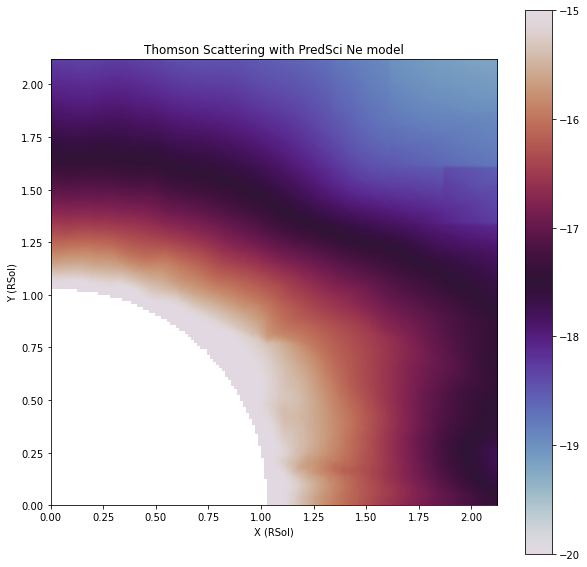

In [104]:
"""
Visualization of the ThomsonScattering.
"""
"""
cmap
['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight', 'twilight_shifted']
"""

"""
interpolation
'none', 'antialiased', 'nearest', 'bilinear', 
'bicubic', 'spline16', 'spline36', 'hanning', 
'hamming', 'hermite', 'kaiser', 'quadric', 
'catrom', 'gaussian', 'bessel', 'mitchell', 
'sinc', 'lanczos', 'blackman'

"""

"""
interpolation_stage{'data', 'rgba'}, default: 'data'
"""

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("Thomson Scattering with PredSci Ne model")
plt.ylabel("Y (RSol)")
plt.xlabel("X (RSol)")
plt.imshow(np.log(model) / np.log(11), 
           cmap = 'twilight', 
           interpolation = 'gaussian',
           interpolation_stage = 'data',
           vmin = -20, 
           vmax = -15,
           extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
plt.colorbar()